In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [3]:
# load data into the notebook
Distribution_Data = pd.read_csv(r'C:\Users\SAGE\Documents\Data Science\MY DATA ANALYSIS TUTORIAL\Python\Project\weather project\ev_distribution_dataset (2).csv')
Geospatial_Data = pd.read_csv(r'C:\Users\SAGE\Documents\Data Science\MY DATA ANALYSIS TUTORIAL\Python\Project\weather project\geospatial_dataset.csv')
Weather_Data = pd.read_csv(r'C:\Users\SAGE\Documents\Data Science\MY DATA ANALYSIS TUTORIAL\Python\Project\weather project\weather_dataset.csv')              

In [4]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [5]:
Geospatial_Data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [6]:
Weather_Data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


In [7]:
# check data types and missing values
Distribution_Data.info()

# description of numerical columns
Distribution_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [8]:
# check data types and missing values
Geospatial_Data.info()

# description of numerical columns
Geospatial_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [9]:
# check data types and missing values
Weather_Data.info()

# description of numerical columns
Weather_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


<h2 style="font-size: 30px;">Exploratory Data Analysis</h2>

#### This phase involves both Univariate and Bivariate analysis 

#### Univariate Analysis
1. Visualize the distribution of electricity coonsumption.
2. Analyze the distribution of EV type, charging habits, customer types

#### Bivariate Analysis
3. Use geospatial data to visualize the locations of substations and EV charging stations
4. Analyze the capacity of transmission lines 

Text(0, 0.5, 'EV Type')

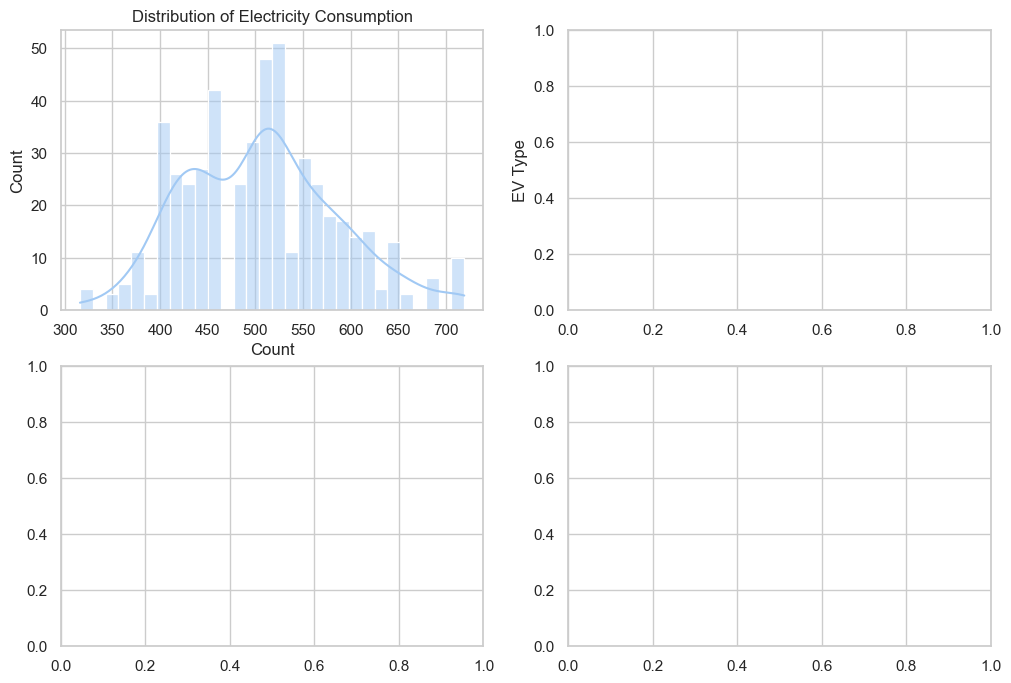

In [10]:
# set the style and color palette of the plots
sns.set(style = "whitegrid")
sns.set_palette("pastel")

# create a 2x2 subplot grid
fig, axes = plt.subplots(2,2, figsize = (12, 8))

#plot the distribution of electricity consumption
sns.histplot(data=Distribution_Data, x="Electricity_Consumption (kWh)", bins=30, kde = True, ax = axes[0,0])
axes[0,0].set_title("Distribution of Electricity Consumption")
axes[0,0].set_xlabel("Count") 
axes[0,1].set_ylabel("EV Type")                        